#***Exploratory Sales Analysis of Mobile Phones and Laptops***
######An in-depth exploratory data analysis project to uncover sales trends, product performance, and business insights using Python

# 🔹 Step 1: Importing Required Python Libraries

Every data analysis project starts by setting up the right tools. In this step, we import Python libraries that help us work with data easily and efficiently. These libraries allow us to read files, clean messy data, perform calculations, and create meaningful charts. Pandas helps us handle tables of data just like Excel, but with more power and flexibility. Matplotlib allows us to draw graphs so trends become easy to understand visually. Seaborn makes these graphs look clean, professional, and easier to interpret. Importing all libraries at the beginning ensures that the notebook runs smoothly without interruptions later. This step creates the foundation for everything that follows in the analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 🔹 Step 2: Loading the Dataset

In this step, we load the sales dataset into Python so that it can be analyzed. The dataset contains detailed information about mobile phones and laptops, including product type, brand, region, price, quantity sold, processor details, and dates. The data is stored in a CSV file, which is one of the most common formats used in real business environments. By loading the data into a pandas DataFrame, we convert it into a structured table that is easy to explore and manipulate. Viewing the first few rows helps confirm that the data has been loaded correctly. This step helps us understand what kind of information we are working with before making any decisions or calculations.

In [ ]:
df = pd.read_csv("dataset.csv")
df.head(2)


,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB


# 🔹 Step 3: Cleaning the Data

Real-world business data is rarely perfect, and this dataset is no exception. It may contain missing values, incorrect entries, or inconsistent formats that can affect analysis results. In this step, we focus on cleaning the data so that it becomes reliable and safe to use. Missing values such as n/a, NaN, or similar text can cause errors during calculations if left untreated. By replacing these values and filling empty cells, we make sure the dataset is consistent. Clean data leads to accurate insights and trustworthy results. This step is extremely important because even the best analysis can fail if the data is not properly cleaned.

In [ ]:
df = df.replace(['n/a', 'N/A', 'NaN', 'nan'], '', regex=True)
df = df.fillna('')

# 🔹 Step 4: Understanding Overall Product Sales Performance

Once the data is clean, we begin the actual analysis by looking at overall sales performance. In this step, we calculate how many laptops and mobile phones were sold in total. We also calculate the percentage contribution of each product category to total sales. This helps us understand which product type performs better in the market. The pie chart visually shows how sales are distributed between laptops and mobile phones. This step gives a high-level overview of the business and helps answer a basic but important question: which product category drives most of the sales?

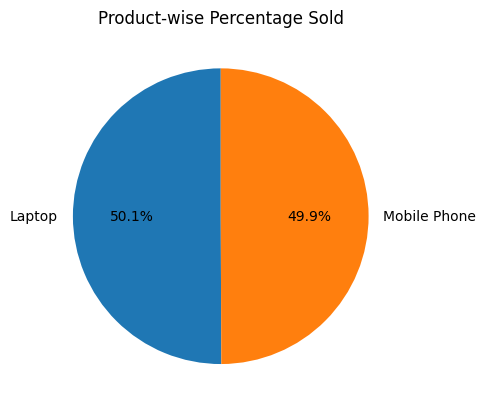

In [ ]:
df2 = df.groupby("Product", as_index=False)["Quantity Sold"].sum()

df2["Percentage Sold"] = round(
    df2["Quantity Sold"] / df2["Quantity Sold"].sum() * 100, 2)

plt.pie(
    df2["Percentage Sold"],
    labels=df2["Product"],
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Product-wise Percentage Sold")
plt.show()



# 🔹 Step 5: Identifying the Top-Selling Brand in Each Product Category

Not all brands perform equally in the market. In this step, we analyze brand-level performance for laptops and mobile phones. By grouping the data by product type and brand, we calculate how many units each brand sold. Sorting the results helps us quickly identify the top-selling brand in each category. This insight is useful for understanding customer preferences and market dominance. Businesses can use this information to strengthen partnerships with high-performing brands or improve strategies for weaker ones. This step moves the analysis from product-level to brand-level insights.

In [ ]:
df2 = df.groupby(["Product", "Brand"], as_index=False)["Quantity Sold"].sum()

df2.sort_values(
    ["Product", "Quantity Sold"],
    ascending=[True, False],
    inplace=True)

top_sold = df2.groupby("Product").head(1)
top_sold

,Product,Brand,Quantity Sold
1,Laptop,Apple,7443
24,Mobile Phone,Google,7182


# 🔹 Step 6: Analyzing Average Product Prices

Price plays a major role in customer buying decisions. In this step, we calculate the average selling price of laptops and mobile phones. This helps us understand the general pricing level of each product category. Comparing average prices also gives insight into whether higher prices affect sales volume. Recruiters and business stakeholders often look for such analysis because pricing strategy is closely linked to revenue and profitability. This step adds a financial perspective to the sales analysis and connects numbers to real business decisions.

In [ ]:
Average_Price = round(
    df.groupby("Product", as_index=False)["Price"].mean(), 2
)
Average_Price


,Product,Price
0,Laptop,102784.61
1,Mobile Phone,102498.01


# 🔹 Step 7: Region-Wise Sales Analysis

Sales performance can vary greatly from one region to another. In this step, we analyze how sales are distributed across different regions. We calculate the total quantity sold for each product type in each region. This helps identify which regions perform best for laptops and mobile phones. Such insights are important for planning marketing campaigns, inventory distribution, and regional sales strategies. This step shows how location impacts sales performance and helps businesses focus their efforts where demand is highest.

In [ ]:
df3 = (
    df.groupby(["Region", "Product"], as_index=False)["Quantity Sold"]
      .sum()
      .sort_values(["Product", "Quantity Sold"], ascending=[True, False])
)

top_sold_Region = df3.groupby("Product").head(1)
top_sold_Region


,Region,Product,Quantity Sold
8,West,Laptop,28595
9,West,Mobile Phone,28007


# 🔹 Step 8: Identifying Top 5 Customers by Sales Volume

In most businesses, a small number of customers contribute a large portion of sales. In this step, we identify the top five customers based on the total quantity they purchased. We also include their region to add more business context. This analysis helps identify high-value customers who may deserve special attention, discounts, or loyalty programs. Understanding customer contribution is important for customer retention and long-term growth. This step shows how data can be used to strengthen customer relationships.

In [ ]:
df_x = (
    df.groupby("Customer Name", as_index=False)["Quantity Sold"]
      .sum()
      .sort_values("Quantity Sold", ascending=False)
      .head(5)
)

Customer_region = df.drop_duplicates("Customer Name")[["Customer Name", "Region"]]

df_x = pd.merge(df_x, Customer_region, on="Customer Name")
df_x


,Customer Name,Quantity Sold,Region
0,Robert Smith,117,West
1,Michael Johnson,113,South
2,Michael Williams,110,West
3,John Smith,107,North
4,James Brown,99,East


# 🔹 Step 9: Understanding Monthly Sales Performance Over Time

In this step, we analyze how sales revenue changes over time on a monthly basis. First, revenue is calculated using price and quantity sold. Then, the dispatch date is converted into a monthly format so sales can be grouped by month. A line chart is used to visualize these monthly revenue trends. This makes it easy to see growth, decline, or repeating patterns in sales. Such trends help identify high-performing months and slow periods. This insight is valuable for forecasting, planning promotions, and understanding seasonality in the business.

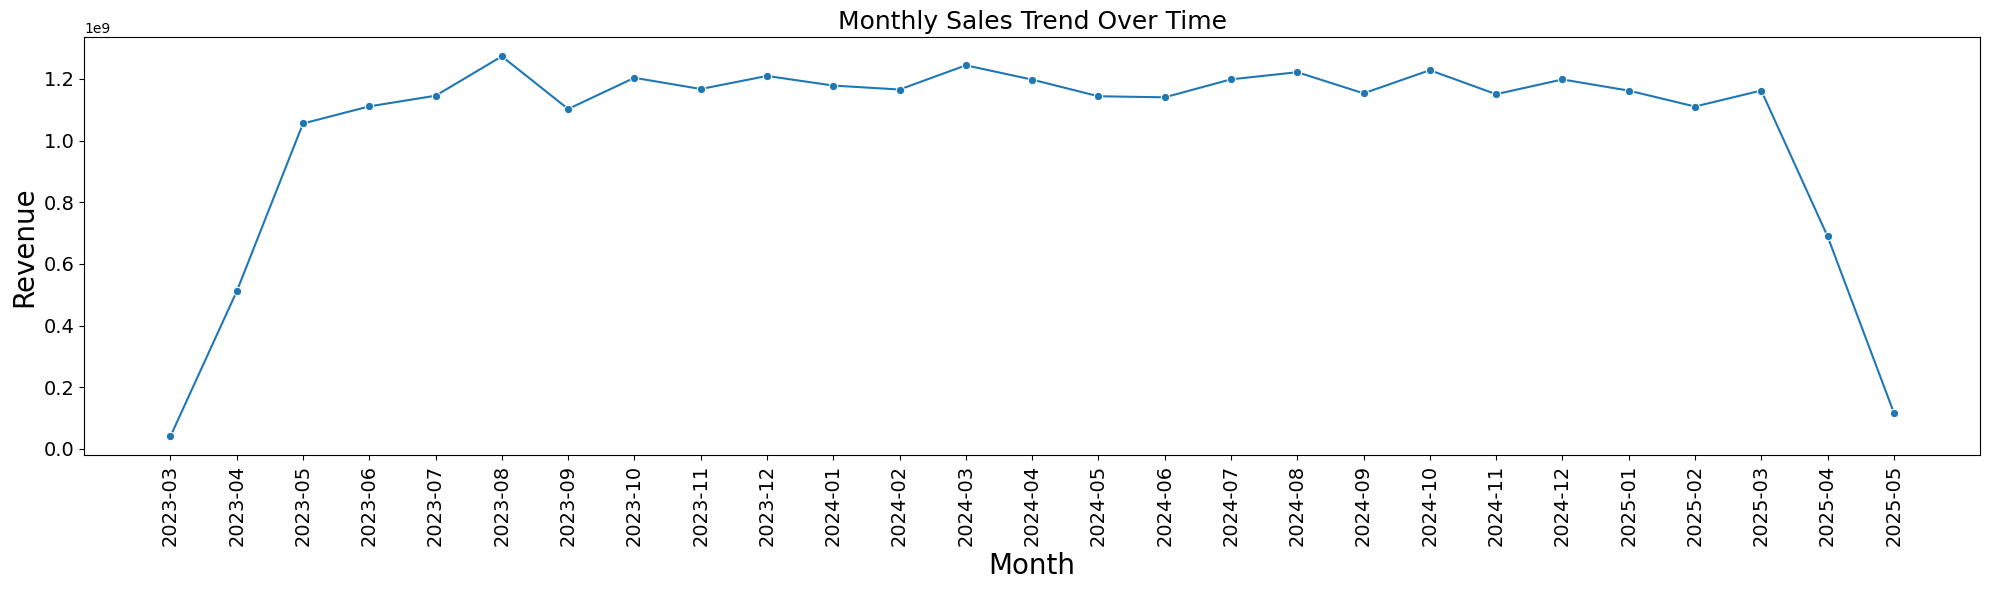

In [ ]:
# Create Revenue column
df["Revenue"] = df["Price"] * df["Quantity Sold"]

# Convert Dispatch Date to datetime and extract month
df["Dispatch Date"] = pd.to_datetime(df["Dispatch Date"])
df["Dispatch Month"] = df["Dispatch Date"].dt.to_period("M")

# Aggregate monthly revenue
monthly_sales = (
    df.groupby("Dispatch Month")["Revenue"]
      .sum()
      .reset_index()
)

# Convert Period to string for plotting
monthly_sales["Dispatch Month"] = monthly_sales["Dispatch Month"].astype(str)

# Plot monthly sales trend
plt.figure(figsize=(20, 6))
sns.lineplot(
    x="Dispatch Month",
    y="Revenue",
    data=monthly_sales,
    marker="o"
)

# Increase font sizes
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Month", fontsize=20)
plt.ylabel("Revenue", fontsize=20)
plt.title("Monthly Sales Trend Over Time", fontsize=18)

plt.tight_layout()
plt.show()
